<a href="https://colab.research.google.com/github/Alanoud2209832/T5-SDAIA/blob/main/Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [3]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 237MB/s]


## Importing Libraries

In [221]:
!pip install scikit-learn

In [189]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [6]:
df.shape

(147972, 21)

In [7]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [8]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [9]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [12]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [25]:
df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)
df['Reason'].fillna(df['Reason'].mode()[0], inplace=True)
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)
df['Route_Number'].fillna(df['Route_Number'].mode()[0], inplace=True)
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)

In [30]:
df.drop(columns=['Incident_Number'], inplace=True)

KeyError: "['Incident_Number'] not found in axis"

In [27]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [28]:
df.duplicated().sum()

0

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [43]:
label_encoder = LabelEncoder()
df['School_Year'] = label_encoder.fit_transform(df['School_Year'])
df['Run_Type'] = label_encoder.fit_transform(df['Run_Type'])
df['Bus_No'] = label_encoder.fit_transform(df['Bus_No'])
df['Route_Number'] = label_encoder.fit_transform(df['Route_Number'])
df['Reason'] = label_encoder.fit_transform(df['Reason'])
df['Schools_Serviced'] = label_encoder.fit_transform(df['Schools_Serviced'])
df['Occurred_On'] = label_encoder.fit_transform(df['Occurred_On'])
df['Created_On'] = label_encoder.fit_transform(df['Created_On'])
df['Boro'] = label_encoder.fit_transform(df['Boro'])
df['Bus_Company_Name'] = label_encoder.fit_transform(df['Bus_Company_Name'])
df['How_Long_Delayed'] = label_encoder.fit_transform(df['How_Long_Delayed'])
df['Has_Contractor_Notified_Schools'] = label_encoder.fit_transform(df['Has_Contractor_Notified_Schools'])
df['Has_Contractor_Notified_Parents'] = label_encoder.fit_transform(df['Has_Contractor_Notified_Parents'])
df['Have_You_Alerted_OPT'] = label_encoder.fit_transform(df['Have_You_Alerted_OPT'])
df['Informed_On'] = label_encoder.fit_transform(df['Informed_On'])
df['Last_Updated_On'] = label_encoder.fit_transform(df['Last_Updated_On'])
df['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df['Breakdown_or_Running_Late'])
df['School_Age_or_PreK'] = label_encoder.fit_transform(df['School_Age_or_PreK'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      147972 non-null  int64
 1   Busbreakdown_ID                  147972 non-null  int64
 2   Run_Type                         147972 non-null  int64
 3   Bus_No                           147972 non-null  int64
 4   Route_Number                     147972 non-null  int64
 5   Reason                           147972 non-null  int64
 6   Schools_Serviced                 147972 non-null  int64
 7   Occurred_On                      147972 non-null  int64
 8   Created_On                       147972 non-null  int64
 9   Boro                             147972 non-null  int64
 10  Bus_Company_Name                 147972 non-null  int64
 11  How_Long_Delayed                 147972 non-null  int64
 12  Number_Of_Students_On_The_Bus 

In [57]:
scaler = MinMaxScaler()
numerical = ['Number_Of_Students_On_The_Bus']

In [59]:
df[numerical] = scaler.fit_transform(df[numerical])

In [181]:
numeric_columns = df.select_dtypes(include=['object']).columns
print(df)

        School_Year  Busbreakdown_ID  Run_Type  Bus_No  Route_Number  Reason  \
0                 0          1224901         3    7481            77       6   
1                 0          1225098         3    8114            77       3   
2                 0          1215800         3    4662           209       3   
3                 0          1215511         3    4547           209       6   
4                 0          1215828         3    4554           209       6   
...             ...              ...       ...     ...           ...     ...   
147967            1          1338452         3    8138           209       3   
147968            1          1341521         3      15           479       3   
147969            1          1353044         9    8642         10880       3   
147970            1          1353045         9    6145          7663       9   
147971            1          1353046         6    3502          2288       6   

        Schools_Serviced  Occurred_On  

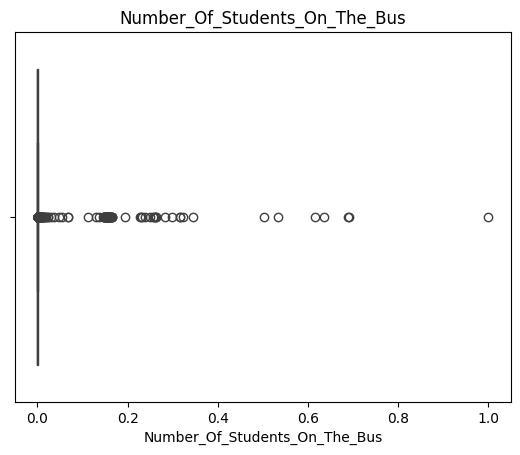

In [113]:
for col in numerical:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f'{col}')
  plt.show()

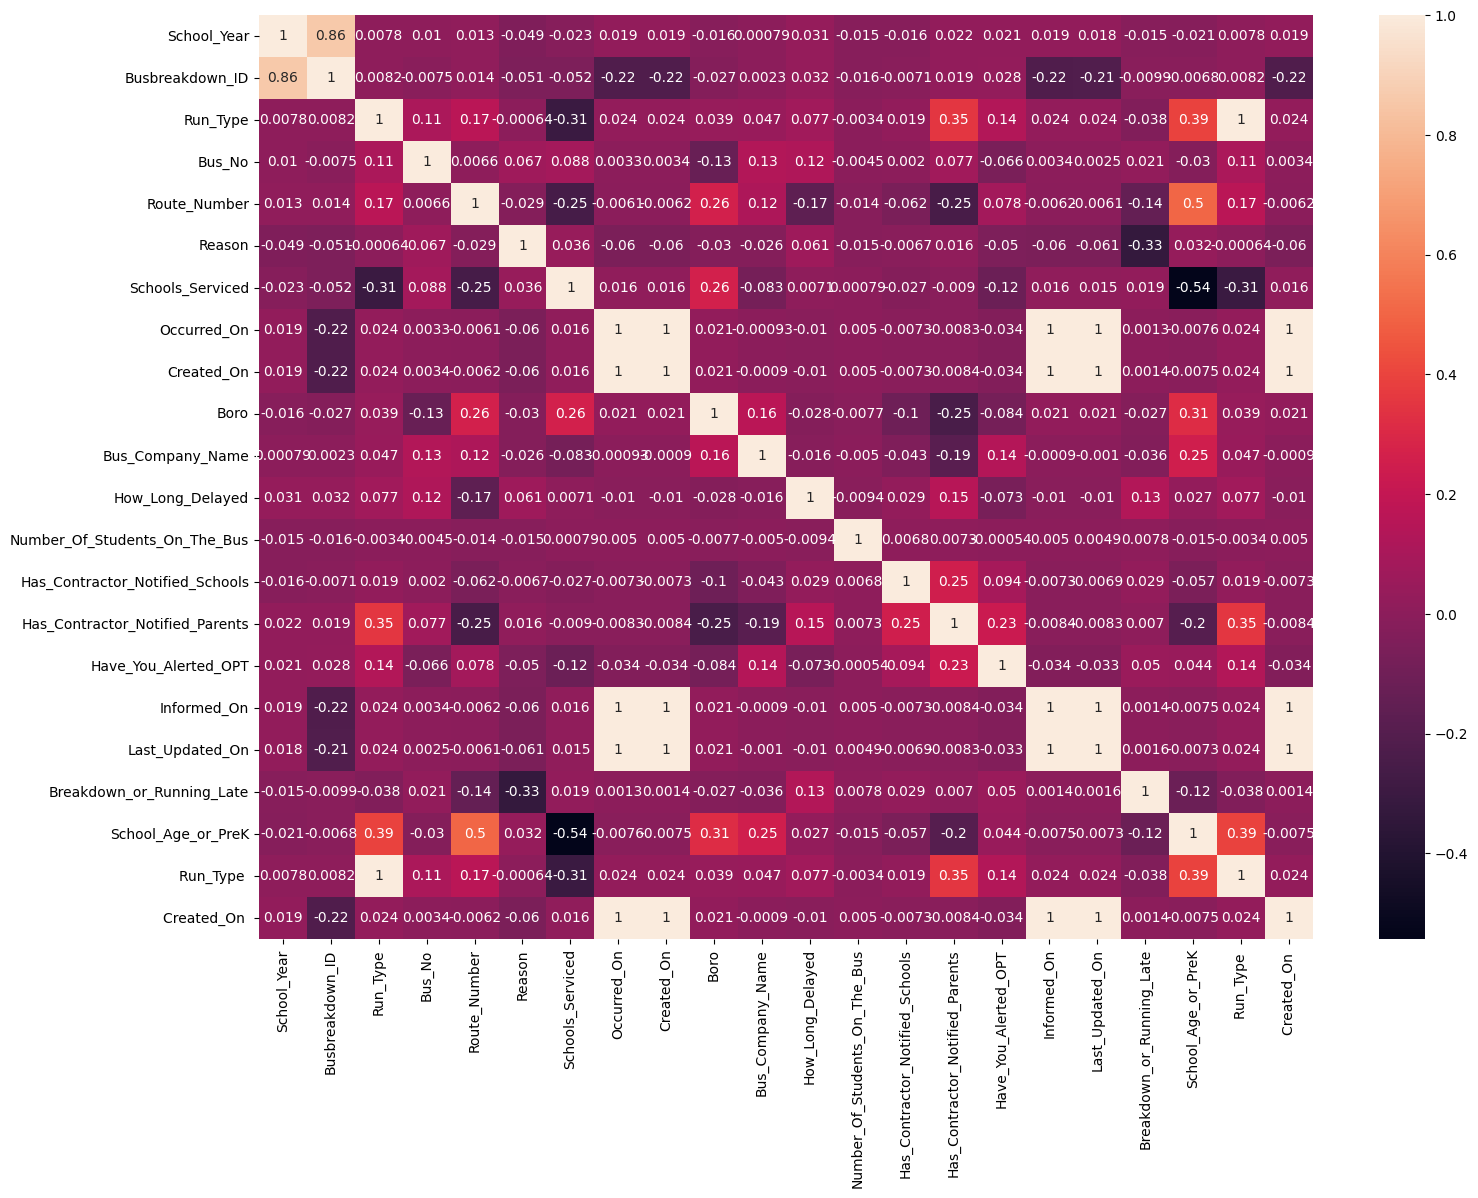

In [111]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(17,12))
sns.heatmap(corr, annot=True)
plt.show()

In [174]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK', 'Run_Type ',
       'Created_On '],
      dtype='object')

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [46]:
X = df.drop('Breakdown_or_Running_Late' ,axis=1)
y = df['Breakdown_or_Running_Late']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [244]:
model = Sequential()

In [245]:
model.add(Dense(126, activation='relu', input_shape=(X_train.shape[1],)))

# model.add(Dropout(0.1))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


In [246]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                     │ (None, 126)                 │           2,772 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 6)                   │             762 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,583 (14.00 KB)

 Trainable params: 3,583 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [247]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [256]:
history = model.fit(X_train, y_train, validation_data=(X, y), epochs=10)

Epoch 1/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8833 - loss: 0.3604 - val_accuracy: 0.8843 - val_loss: 0.3583
Epoch 2/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8835 - loss: 0.3599 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 3/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8820 - loss: 0.3629 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 4/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8843 - loss: 0.3583 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 5/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8836 - loss: 0.3598 - val_accuracy: 0.8843 - val_loss: 0.3583
Epoch 6/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8832 - loss: 0.3607 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 7/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8823 - loss: 0.3625 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 8/10
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8815 - loss: 0

In [248]:
history = model.fit(X_train, y_train, validation_data=(X, y), epochs=5)

Epoch 1/5
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8567 - loss: 598.5279 - val_accuracy: 0.8843 - val_loss: 0.3583
Epoch 2/5
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8838 - loss: 0.3593 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 3/5
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8827 - loss: 0.3616 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 4/5
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8830 - loss: 0.3611 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 5/5
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8845 - loss: 0.3579 - val_accuracy: 0.8843 - val_loss: 0.3582


In [257]:
history = model.fit(X_train, y_train, validation_data=(X, y), epochs=20)

Epoch 1/20
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8817 - loss: 0.3636 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 2/20
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8846 - loss: 0.3577 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 3/20
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8864 - loss: 0.3540 - val_accuracy: 0.8843 - val_loss: 0.3583
Epoch 4/20
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8821 - loss: 0.3627 - val_accuracy: 0.8843 - val_loss: 0.3583
Epoch 5/20
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8854 - loss: 0.3561 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 6/20
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8820 - loss: 0.3629 - val_accuracy: 0.8843 - val_loss: 0.3582
Epoch 7/20
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8843 - loss: 0.3583 - val_accuracy: 0.8843 - val_loss: 0.3584
Epoch 8/20
3237/3237 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8847 - loss: 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [258]:
model.evaluate(X_test, y_test)

1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8860 - loss: 0.3551


[0.35545262694358826, 0.8858127593994141]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

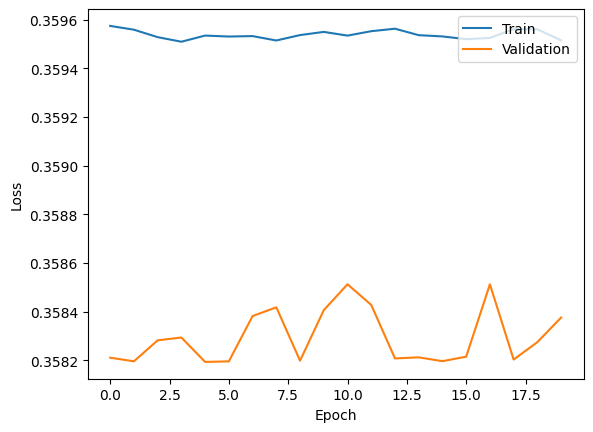

In [259]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Save the Model
Save the trained model for submission.

In [188]:
model.save('task1.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

# **Data Preprocessing**


I used One-hot encoding to convert categorical variables into numerical format

there is was alot of null variables in the dataset i fill it all just one column  (Incident_Number)heve 142340 nulls so i drop it  




# *Model* Architecture


input layer i used 126 neurons and relu activation

hidding layer i used 6 neurons and relu activation

output layer i used 1 neurons and sigmoid activation

I tried changing the numbers a lot to improve my model, but it did not work for me

also i tried to changing the number of epochs but also did not work

my model have 88% accuracy and ithink it is not good enough also have underfitting problem
